In [ ]:
import numpy as np

In [ ]:
import csv

In [ ]:
import matplotlib.pyplot as plt

In [107]:
from scipy.stats import norm

In [ ]:
afrodev = open('/content/formulario_fofoqueiro.csv')

csvreader = csv.reader(afrodev, delimiter=';')

header = []
header = next(csvreader)

rows = []
for row in csvreader:
  rows.append(row)

alunos_afrodev = np.array(rows)
afrodev.close()

In [ ]:
{i: val for i, val in enumerate(header)}

In [ ]:
# Média de idade

idades = alunos_afrodev[:,3]
# print(idades[:5])

idade = np.array([int(s.split(' ')[0]) for s in idades])
# print(idade[:5])

idade.mean()

### Calcular o somatório do salário dos sonhos

In [ ]:
salarios_sonho = alunos_afrodev[:,9]
# print(salarios_sonho[:5])

In [ ]:
# Tratamento dos dados

def tratamento_dados(valor):
  dado_tratado = valor.replace('R$', '').replace('k', '000').replace(' ', '').replace('mil', '000').replace('+', '').replace('mensais', '').replace(',00', '').replace('reais','')
  dado_tratado = dado_tratado.replace('.', '')
  return dado_tratado

In [ ]:
salarios_tratados = np.array([int(tratamento_dados(i)) for i in salarios_sonho])
print(salarios_tratados[:100])

In [ ]:
soma_salarios = sum(salarios_tratados)
print(soma_salarios)


 #### Sabendo que o salário mínimo é de R$ 1.192,40, e o crescimento anual é de 5%, quantos anos cada pessoa levaria para chegar no salário dos sonhos, levando em consideração a coluna Qual seu salário dos sonhos ?

In [ ]:
def anos_para_sonho(valor):
  salario_minimo = 1192.40
  anos = 0
  while salario_minimo < valor:
    anos += 1
    salario_minimo *= 1.05
  return anos

In [ ]:
tempo_sonho = np.array([anos_para_sonho(i) for i in salarios_tratados])
print(tempo_sonho)

In [ ]:
array_sonhos = np.array([anos_para_sonho(i) for i in salarios_tratados])
print(tempo_sonho)

In [ ]:
total_de_anos = np.array(array_sonhos) + np.array(idade)
print(total_de_anos)


In [ ]:
id_anos = np.array([[x+1, y] for x,y in enumerate(total_de_anos)])
print(id_anos)

In [ ]:
[[x, y] for x, y in id_anos if y >= 90]

### MatplotLib

In [ ]:
# Para se far um grafico, precisamos de pelo menos coordenadas em nosso 
# plano cartesiano.

x = 2.0
y = 4.0

plt.scatter(x,y)

In [ ]:
# Ou podemos criar uma lista de pontos para x e y.

x = range(salarios_tratados.size)

y = salarios_tratados

plt.scatter(x,y)

In [ ]:
# Ou podemos criar uma lista de pontos para x e y.

plt.scatter(y, x)

In [ ]:
# Agora vamos usar uma nova função a plot, que plota um gráfico que liga todos 
# os pontos, na ordem informada.

plt.plot(x,y)
plt.show()

In [ ]:
# Primeiro vamos dar um título ao nosso grafico

plt.plot(x,y)
plt.title('Salário dos sonhos')
plt.show()

In [ ]:
# Podemos mudar a cor da nossa reta

plt.plot(x,y, color='Green')
plt.title('Salário dos sonhos')
plt.show()

In [ ]:
# Para melhorar nossa vizualização, podemos adicionar uma grid

plt.plot(x,y, color='Green')
plt.title('Salário dos sonhos')
plt.grid(True)
plt.show()

In [ ]:
# Um outro ajuste, seria a remoção da borda.

plt.plot(x,y, color='Green')
plt.title('Salário dos sonhos')
plt.grid(True)
plt.box(False)
plt.show()

In [ ]:
# Uma opção que é muito pontual, é ocultar os valores dos eixos.

plt.plot(x,y, color='Green')
plt.title('Salário dos sonhos')
plt.grid(True)
plt.box(False)
plt.xticks([], []) # (nome, valor)
plt.yticks([], [])
plt.show()

In [ ]:
# Para adiconar a legenda, basta adiconar a label, na função de plot que estiver utilizando.
# E ativar, por meio da plt.legend()

plt.plot(x,y, color='Green', label='Salário do aluno')
plt.title('Salário dos sonhos')
plt.grid(True)
plt.box(False)
plt.legend()
plt.show()

In [ ]:
# Vamos aprender agora como colocar a Altua e Largura do gráfico
# Por meio de uma tupla (altura, largura), 
# função [plt.figure(figsize=(altura, largura))]

plt.figure(figsize=(15,10))
plt.plot(x,y, color='Green', label='Salário do aluno')
plt.title('Salário dos sonhos')
plt.grid(True)
plt.box(False)
plt.legend()
plt.show()

In [ ]:
# Uma cenário muito comum, é quando queremos plotar mais de 
# uma informação no mesmo gráfico.
# Vamos plotar agora, alem do salário, a idade de cada estudante.

plt.figure(figsize=(10,8))
# plt.plot(x,salarios_tratados, color='Green', label='Salário do aluno')
plt.plot(x,id_anos[:, 1], color='Green', label='Anos salário sonho')
plt.plot(x,idade, color='Red', label='Idade do aluno')
plt.title('Salário dos sonhos e Idade do aluno')
plt.xlabel('Alunos')
plt.ylabel('Idades')
plt.grid(True)
plt.box(False)
plt.legend()
plt.show()

In [ ]:
# Barras

plt.figure(figsize=(10,8))
plt.bar(x,idade, color='Purple', label='Idade do aluno')
plt.title('Idade dos aluno')
plt.grid(True)
plt.box(False)
plt.xlabel('Alunos')
plt.ylabel('Idades')
plt.legend()
plt.show()

In [ ]:
# Quantidade de alunos por sexo

sexo = alunos_afrodev[:, 2]
generos = {'Masculino': len([x for x in sexo if x == 'Masculino']), 'Feminino': len([x for x in sexo if x == 'Feminino'])}


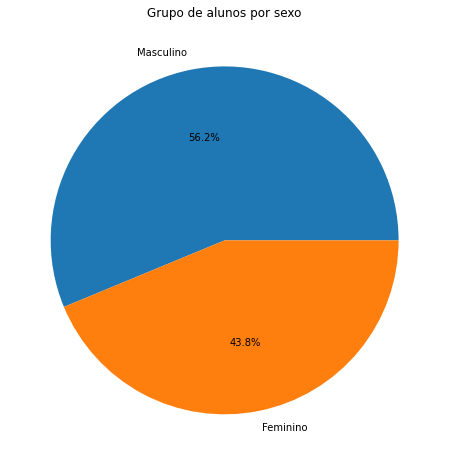

In [97]:
# Pizza

plt.figure(figsize=(10,8))
plt.pie(generos.values(), autopct="%1.1f%%", labels=generos.keys())
plt.title('Grupo de alunos por sexo')
plt.show()

In [101]:
# Determinar bins pela fórmula => mínimo viável
from math import sqrt
grupos = int(sqrt(len(idade)))
print(grupos)

# Bins gerado pelo numpy
counts, bins = np.histogram(idade)
print(len(bins))

5
11


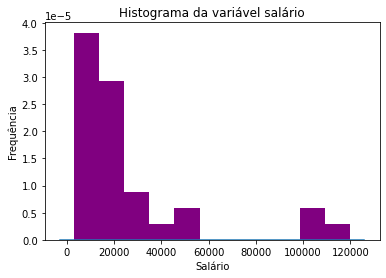

In [109]:
# Histograma
# bins = numero de classes
# com para determinar o um bom numero de classes:
# INT(SQRT(LEN(ELEMENTOS)))

plt.hist(salarios_tratados, bins = len(bins), color='Purple', density=True)
min, max = plt.xlim()
plt.title('Histograma da variável salário')
plt.xlabel('Salário')
plt.ylabel('Frequência')
eixox = np.linspace(min, max, 100)
eixoy = norm.pdf(eixox, idade.mean(), idade.std())
plt.plot(eixox, eixoy)
plt.show()

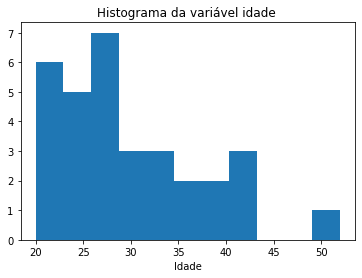

In [104]:
plt.hist(idade, bins=len(bins))
plt.title('Histograma da variável idade ')
plt.xlabel('Idade')
plt.show()

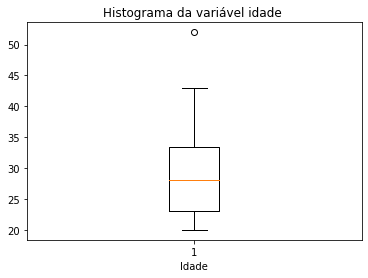

In [110]:
# BOX PLOT
# Os circulos apresentado no gráfico, são valores muito fora do padrão.

plt.boxplot(idade)  
plt.title('Histograma da variável idade ')
plt.xlabel('Idade')
plt.show()

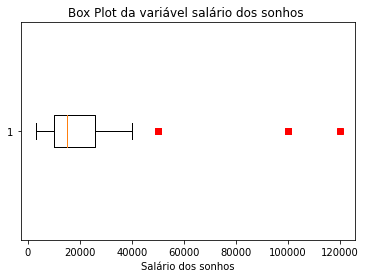

In [95]:
plt.boxplot(salarios_tratados, 0, 'rs', 0)   # Gerando na horizontal
plt.title('Box Plot da variável salário dos sonhos ')
plt.xlabel('Salário dos sonhos')
plt.show()

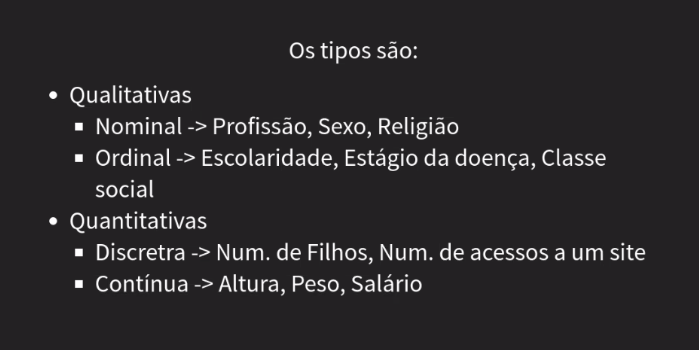

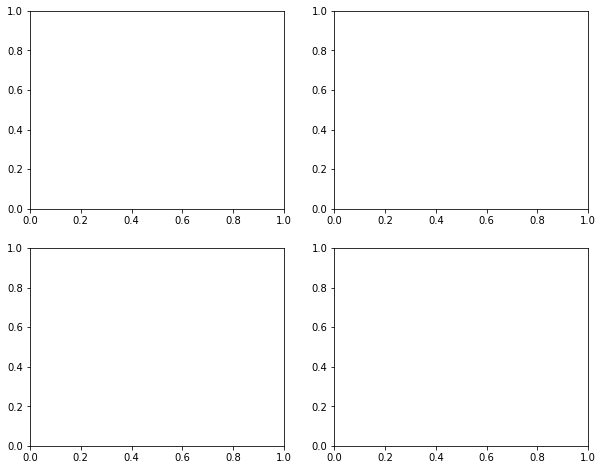

In [115]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


plt.show()

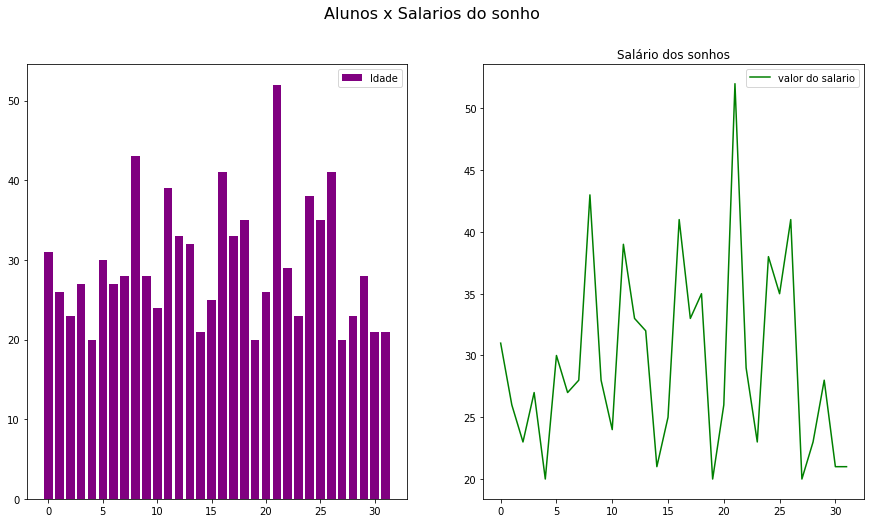

In [117]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)

ax1.bar(x, idade, color='Purple', label='Idade')
ax1.set_label('Idade dos Alunos')
# ax1.set_ylabel('idade')

ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x, idade, color='green', label='valor do salario')
ax2.set_title('Salário dos sonhos')
# ax2.set_ylabel('Salário')

ax2.legend()

fig.suptitle('Alunos x Salarios do sonho', fontsize=16)
plt.show()



In [118]:
atraente = alunos_afrodev[:, 17].astype(int)

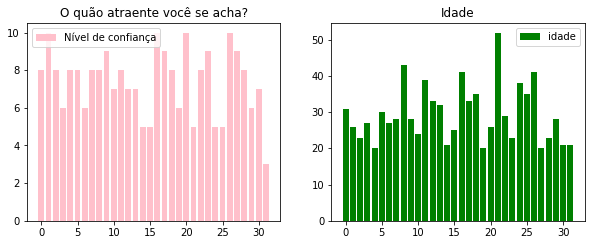

In [121]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.bar(range(atraente.size), atraente, color='pink', label='Nível de confiança')
ax2.bar(range(idade.size), idade, color='green', label='idade')

ax1.set_title('O quão atraente você se acha?')
ax2.set_title('Idade')

ax1.legend()
ax2.legend()


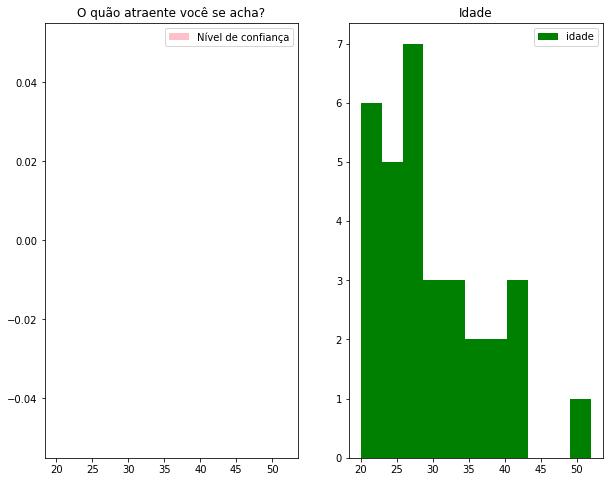

In [128]:
fig = plt.figure(figsize=[10,8])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(atraente, color='pink', label='Nível de confiança', bins=len(bins))
ax2.hist(idade, color='green', label='idade', bins=len(bins))

ax1.set_title('O quão atraente você se acha?')
ax2.set_title('Idade')

ax1.legend()
ax2.legend()
plt.show()

`fig = plt.figure(figsize=[10,8]) ax1 = fig.add_subplot(1,2,1) ax2 = fig.add_subplot(1,2,2) ax1.hist(atraente, color='pink', label='Nivel de confiança', bins=bins) ax2.hist(idade, color='green', label='idade', bins=bins) ax1.set_title("O quão atraente você se acha?") ax2.set_title('Idade') ax1.grid(True) ax2.grid(True) ax1.legend() ax2.legend() plt.show() `